# Hands-on Exercise 2

## Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from itertools import combinations

## Loading the dataset

In [5]:
car_data = pd.read_csv('car_pricing.csv')
display(car_data.head())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Part 1: Problem Definition & EDA

### What is the problem?

The primary objective of this assignment is to develop a robust price prediction model for automobiles using the provided dataset. Specifically, the target variable is the <b>Manufacturer's Suggested Retail Price (MSRP)</b>. Accurate prediction of MSRP is essential for various stakeholders in the automotive industry, including manufacturers, dealers, and consumers. By leveraging the attributes of over 10,000 automobiles, the goal is to identify the key factors that influence car pricing and build a <b>regression model</b> that can predict MSRP with high accuracy.



### Who might be interested in this problem and why?

Several stakeholders would find this price prediction model valuable:
Automotive Manufacturers: To understand the pricing dynamics of their vehicles relative to competitors and market trends, enabling strategic pricing decisions.
Car Dealers and Retailers: To set competitive prices, manage inventory, and offer attractive financing options based on predicted MSRP.
Consumers and Car Buyers: To assess the fairness of the listed prices, negotiate better deals, and make informed purchasing decisions.
Financial Institutions: For setting loan terms and assessing the value of vehicles used as collateral.
Market Analysts and Researchers: To study market trends, demand elasticity, and the impact of various car features on pricing.

A **car price prediction model** serves multiple purposes within the automotive market by addressing key challenges:

<b> Price Transparency </b>
- **Buyers**: Assists in evaluating whether a quoted price is fair by considering factors like make, model, year, and market trends.
- **Sellers**: Enables setting competitive prices that reflect current market values, enhancing sale opportunities.

<b> Market Analysis </b>
- Offers insights into how various factors affect car prices, supporting informed decision-making.

<b> Information Asymmetry </b>
- Reduces the knowledge gap between buyers and sellers, leading to fairer pricing and improved trust.

<b> Time Efficiency </b>
- Provides instant price estimates, saving time for both buyers and sellers during transactions.

<b> Insurance Valuation </b>
- Helps insurance companies accurately assess vehicle values for quotes or total loss claims, enhancing pricing accuracy.

<b> Decision Making </b>
- Guides buyers in selecting cars based on price predictions and aids sellers in identifying optimal times to sell.

<b> Strategic Pricing </b>
- Enables dealerships to dynamically adjust pricing based on market conditions, maximizing competitiveness.

<b> Fraud Detection </b>
- Identifies unusual pricing patterns, potentially uncovering fraud or misrepresentation in the market.

<b> Leasing and Rental Support </b>
- Assists in estimating residual values, supporting accurate leasing and rental agreements.

---

<b> Benefits </b>
- **Enhanced Market Liquidity**: Facilitates smoother transactions through stable and predictable pricing, benefiting all market participants.

The success of car price prediction models depends on high-quality data, robust algorithms, and a deep understanding of market dynamics. When implemented effectively, these models streamline the buying and selling process, bringing value to all stakeholders within the automotive industry.


### What does the data look like?

In [13]:
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [14]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [15]:
for col in car_data.columns:
    if car_data[col].dtype == 'object':
        print(col)
        print(car_data[col].unique())
        print('----'*20)

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
--------------------------------------------------------------------------------
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '5

- **Continuous Variables**:
  - `Engine HP`: Represents the engine horsepower, indicating the power output of the vehicle.
  - `highway MPG`: The car's fuel efficiency on the highway, measured in miles per gallon.
  - `city mpg`: The car's fuel efficiency in city driving conditions, also measured in miles per gallon.
  - `Popularity`: A numerical score representing the popularity of the car model.
  - `MSRP`: The Manufacturer's Suggested Retail Price, indicating the initial retail price of the car.

- **Discrete Variables**:
  - `Year`: The year the car was manufactured.
  - `Engine Cylinders`: The number of cylinders in the car’s engine.
  - `Number of Doors`: The total number of doors on the vehicle.

- **Ordinal Variables**:
  - `Vehicle Size`: Represents the overall size classification of the vehicle (e.g., Compact, Midsize, etc.).

- **Nominal Variables**:
  - `Make`: The manufacturer or brand of the car.
  - `Model`: The specific model name of the car within a brand.
  - `Engine Fuel Type`: The type of fuel the car's engine requires (e.g., gasoline, diesel).
  - `Transmission Type`: The type of transmission system (e.g., manual, automatic).
  - `Driven_Wheels`: Specifies which wheels receive power (e.g., front-wheel drive, rear-wheel drive).
  - `Market Category`: Tags or labels describing market segments or car characteristics (e.g., Luxury, Performance).
  - `Vehicle Style`: The body style of the vehicle (e.g., Sedan, SUV).

The dataset before cleaning has <b>11914</b> samples.

<b> Target Variable (Dependent Variable) </b> : `MSRP` is the varaible we need to predict in this model and hence becomes the target variable for this model

### Exploratory Data Analysis

#### Data Cleaning

In [21]:
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

To prepare the dataset for model training, certain string (nominal) variables with limited use will be removed. Specifically, the `Market Category` variable will be excluded due to the high number of missing values, making it less reliable for analysis. Additionally, to ensure data consistency for numeric variables potentially used in a regression model, we will drop rows with missing values in the following columns:

- `Engine HP`
- `Engine Cylinders`
- `Number of Doors`

This cleaning process will result in a dataset with fewer missing values and a more relevant set of features for model training.

In [23]:
# Remove unused columns
unused_cols = ['Make', 'Model', 'Vehicle Style','Engine Fuel Type','Transmission Type', 'Market Category']
car_data.drop(columns=unused_cols, inplace=True)

# Drop rows with missing values in numeric columns that are likely to be used in the model
car_data.dropna(subset=['Engine HP', 'Engine Cylinders', 'Number of Doors'],inplace = True)

# Identifying duplicate records and removing them.
car_data.drop_duplicates(inplace=True)

# Display the cleaned data to verify changes
car_data.reset_index(drop=True, inplace=True)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              10922 non-null  int64  
 1   Engine HP         10922 non-null  float64
 2   Engine Cylinders  10922 non-null  float64
 3   Driven_Wheels     10922 non-null  object 
 4   Number of Doors   10922 non-null  float64
 5   Vehicle Size      10922 non-null  object 
 6   highway MPG       10922 non-null  int64  
 7   city mpg          10922 non-null  int64  
 8   Popularity        10922 non-null  int64  
 9   MSRP              10922 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 853.4+ KB


The updated samples post cleaning the dataset is <b>10922</b>

Rechecking the dataset for any missing values:

In [26]:
car_data.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Driven_Wheels       0
Number of Doors     0
Vehicle Size        0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

#### Conversion

In [28]:
## Conversion: Encoding Categorical Variables
# OneHotEncoder for Driven_Wheels
one_hot = OneHotEncoder(sparse_output=False)
df_driven_wheels = pd.DataFrame(one_hot.fit_transform(car_data[['Driven_Wheels']]),
                                columns=one_hot.get_feature_names_out(['Driven_Wheels']))

car_data.rename(columns={'Driven_Wheels': 'Driven_Wheels_OG'}, inplace=True)
car_data = car_data.join(df_driven_wheels)
car_data.drop(columns=['Driven_Wheels_OG'], inplace=True)

# OrdinalEncoder for Vehicle Size
ordinal_encoder = OrdinalEncoder(categories=[['Compact', 'Midsize', 'Large']])
car_data['Vehicle_Size_Encoded'] = ordinal_encoder.fit_transform(car_data[['Vehicle Size']])
car_data.drop(columns=['Vehicle Size'], inplace=True)

In [29]:
display(car_data.head())

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle_Size_Encoded
0,2011,335.0,6.0,2.0,26,19,3916,46135,0.0,0.0,0.0,1.0,0.0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0.0,0.0,0.0,1.0,0.0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0.0,0.0,0.0,1.0,0.0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0.0,0.0,0.0,1.0,0.0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0.0,0.0,0.0,1.0,0.0


#### Data Visualization

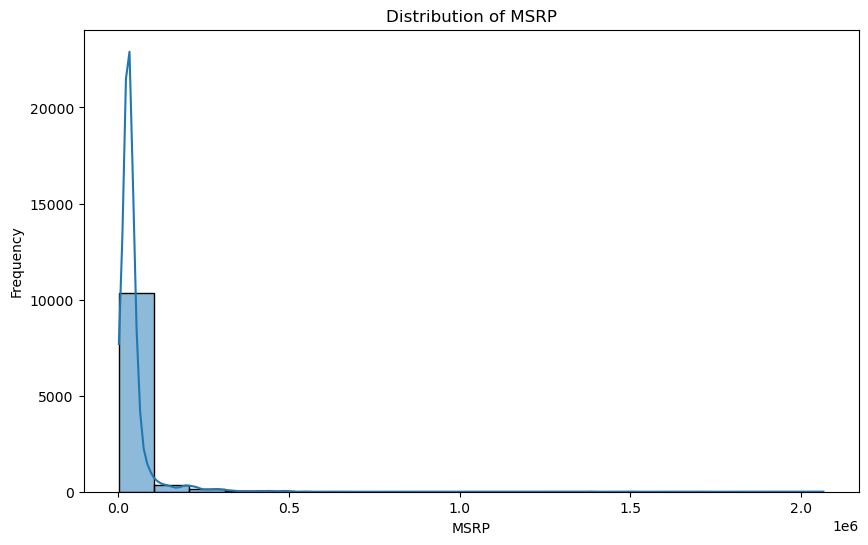

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['MSRP'], bins=20, kde=True, edgecolor='black')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()

<b> Histogram </b>

This histogram shows the distribution of the `MSRP` (Manufacturer's Suggested Retail Price) for cars, which is highly right-skewed. Most cars have lower MSRP values, with a few high-end cars creating a long tail on the right.


- **Visualizing Distribution**: Highlights the right skew in MSRP, showing that most prices are on the lower end.
- **Identifying Outliers**: Reveals a small number of high-priced outliers.
- **Informing Transformations**: Indicates the potential need for log transformation to normalize the data.
  
This helps us understand the general pricing trend and decide on preprocessing steps.


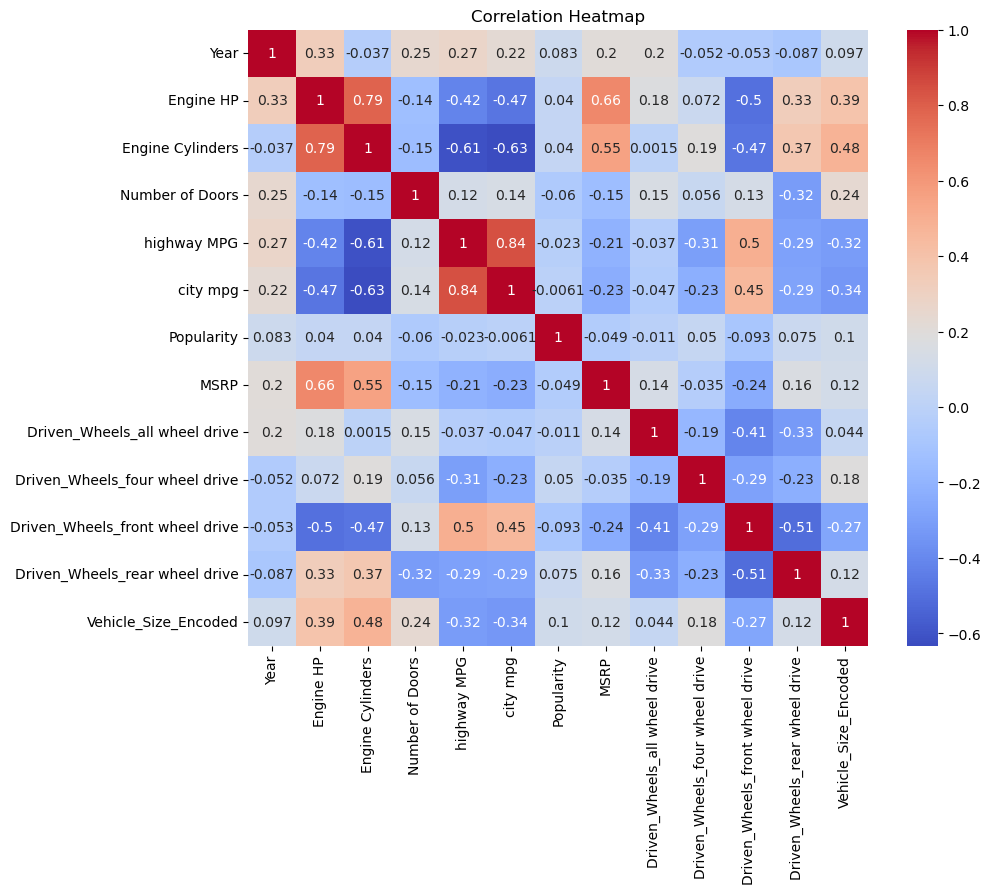

In [34]:
# Heatmap to show correlation between features.
plt.figure(figsize=(10, 8))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<b> Correlation Heatmap Analysis </b>


This heatmap illustrates the correlations between features and the target variable, `MSRP` (Manufacturer's Suggested Retail Price). Key observations include:

- **High Positive Correlations with `MSRP`**:
  - `Engine HP` has a strong positive correlation with `MSRP` (0.66), indicating that cars with higher horsepower tend to have higher prices.
  - `Engine Cylinders` also shows a positive correlation with `MSRP` (0.55), suggesting that cars with more cylinders are generally more expensive.

- **Negative Correlation with `MSRP`**:
  - `Driven_Wheels_rear wheel drive` is negatively correlated with `MSRP` (-0.24), indicating that rear-wheel drive cars are typically priced lower than other drive configurations.

These correlations help in understanding which features are influential in predicting car prices.


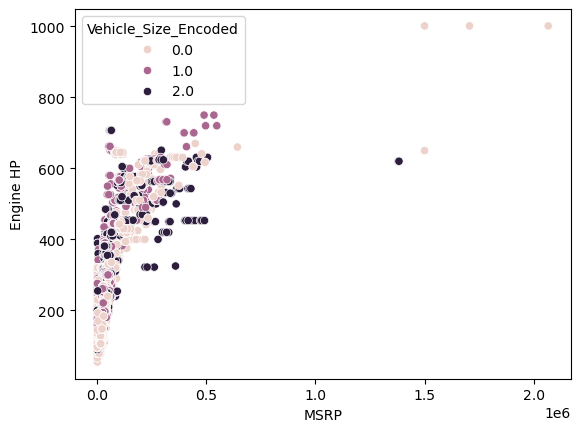

In [37]:
sns.scatterplot(data=car_data, x='MSRP', y='Engine HP',hue='Vehicle_Size_Encoded')
plt.show()

<b> Scatter Plot Analysis: `MSRP` vs. `Engine HP` </b>

This scatter plot visualizes the relationship between `MSRP` (price) and `Engine HP` (horsepower), with points colored by `Vehicle_Size_Encoded`.

- **Positive Relationship**: There is a general upward trend, indicating that cars with higher horsepower (`Engine HP`) tend to have higher prices (`MSRP`).
- **Vehicle Size**: The color variations show different vehicle sizes, with larger cars (encoded as 2.0) generally occupying the higher horsepower and price ranges.

This plot helps in understanding how horsepower and vehicle size affect car pricing, with larger and more powerful cars typically priced higher.


#### Train/Test Split

In [41]:
X = car_data.drop(columns=['MSRP'])
y = car_data['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Part 2: Simple Regression Models

### Model 1: Using 'Engine HP' as the explanatory variable.

`Engine HP` was chosen as the single explanatory variable for this initial regression model due to its strong positive correlation with the target variable, `MSRP`, as observed in the correlation heatmap (correlation of 0.66). This indicates that horsepower is a significant factor in car pricing, with higher horsepower generally associated with higher prices.

Additionally, the scatter plot of `MSRP` vs. `Engine HP` showed a clear positive trend, reinforcing that `Engine HP` has a notable impact on `MSRP`. By selecting `Engine HP` alone, we can explore how well this single factor can predict car prices and set a baseline for model performance before adding more variables.


In [45]:
lr1 = LinearRegression()
lr1.fit(X_train[['Engine HP']], y_train)
y_pred1 = lr1.predict(X_test[['Engine HP']])

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 - Engine HP")
print("MAE:", mae1)
print("MSE:", mse1)
print("R2 Score:", r2_1)

Model 1 - Engine HP
MAE: 20819.473498133193
MSE: 1141173460.5792003
R2 Score: 0.5367650436994988


### Model 2: Using 'Engine Cylinders' as the explanatory variable.

`Engine Cylinders` is selected as the explanatory variable for this second model because, like `Engine HP`, it shows a strong positive correlation with `MSRP` (correlation of 0.55) based on the correlation heatmap. This suggests that the number of engine cylinders is another significant factor influencing car prices, as cars with more cylinders tend to be more powerful and, consequently, more expensive.

By using `Engine Cylinders` alone, we can compare its predictive power to `Engine HP` and further understand how individual engine characteristics impact car pricing.


In [48]:
lr2 = LinearRegression()
lr2.fit(X_train[['Engine Cylinders']], y_train)
y_pred2 = lr2.predict(X_test[['Engine Cylinders']])

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 2 - Engine Cylinders")
print("MAE:", mae2)
print("MSE:", mse2)
print("R2 Score:", r2_2)


Model 2 - Engine Cylinders
MAE: 25975.43068664233
MSE: 1565318677.7637813
R2 Score: 0.36459236536903405


### Model 3: Using 'Engine HP' (Logarithmic form)

In [50]:
X_train_log = np.log1p(X_train[['Engine HP']])
X_test_log = np.log1p(X_test[['Engine HP']])

lr3 = LinearRegression()
lr3.fit(X_train_log, y_train)
y_pred3 = lr3.predict(X_test_log)

mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("\nModel 3 - Logarithmic Engine HP")
print("MAE:", mae3)
print("MSE:", mse3)
print("R2 Score:", r2_3)



Model 3 - Logarithmic Engine HP
MAE: 22468.970225360943
MSE: 1489961583.8020656
R2 Score: 0.39518196575333553


### Describing the parameter estimates

The coefficients in a linear regression model represent the **magnitude and direction of the relationship** between each feature and the target variable. Specifically:

In [53]:
engine_hp_coef = lr1.coef_[0]
print("Engine HP Coefficient:", engine_hp_coef)

Engine HP Coefficient: 378.2756719703738


In [54]:
engine_cylinders_coef = lr2.coef_[0]
print("Engine Cylinders Coefficient:", engine_cylinders_coef)

Engine Cylinders Coefficient: 19971.704501933185


In [55]:
log_engine_hp_coef = lr3.coef_[0]
print("Log Engine HP Coefficient:", log_engine_hp_coef)

Log Engine HP Coefficient: 83575.12384114489



- **`Engine HP` Coefficient**: This coefficient indicates the expected change in `MSRP` (car price) for each additional unit increase in `Engine HP` (horsepower), assuming other factors remain constant. For example, if the coefficient is 150, it means that each additional horsepower is associated with an increase in car price by $150. A positive coefficient suggests a positive relationship: as horsepower increases, `MSRP` is expected to increase.

- **`Engine Cylinders` Coefficient**: This coefficient shows the change in `MSRP` for each additional engine cylinder. For instance, if this coefficient is 2000, it means that adding one more cylinder to the engine is associated with an increase in car price by $2000, holding other variables constant. A positive coefficient here also suggests that more cylinders (typically indicating a more powerful engine) are associated with higher prices.

- **Log `Engine HP` Coefficient**: The coefficient (approximately 83,575) indicates that a 1% increase in `Engine HP` is associated with an approximate increase of $835.75 in `MSRP`. This transformation allows for a more interpretable relationship, especially when `Engine HP` has a wide range of values, and shows how price responds to proportional changes in horsepower.

<b> Key Points </b>:
- **Sign**: The sign of the coefficient (+ or -) tells us the direction of the relationship. Positive coefficients indicate that as the feature value increases, `MSRP` also tends to increase.
- **Magnitude**: The size of the coefficient indicates the strength of the relationship. Larger coefficients (in absolute terms) imply that the feature has a stronger influence on the target variable.

These coefficients help us understand how much influence each feature has on predicting `MSRP` in each model.

### Forward and Backward Selection

Forward and backward variable selection are stepwise techniques used to find the best subset of features for a regression model. The goal is to enhance the model's predictive accuracy while keeping it as simple as possible.

- **Forward Selection**: 
  - Start with an empty model.
  - Add variables one by one, choosing the variable that best improves model performance (e.g., by maximizing R² or minimizing MSE).
  - Stop when adding more variables no longer significantly improves the model.

- **Backward Elimination**:
  - Start with a model that includes all variables.
  - Remove the least impactful variable at each step, checking model performance.
  - Stop when further removals would reduce the model's accuracy.


#### Forward Selection

In [60]:
# Initialize lists to track selected features and metrics
selected_features = []
best_r2 = -float('inf')  # Initialize with a very low R² score

# Forward selection
for _ in range(len(X_train.columns)):
    remaining_features = list(set(X_train.columns) - set(selected_features))
    r2_scores_with_candidates = []
    
    # Test each remaining feature
    for feature in remaining_features:
        candidate_features = selected_features + [feature]
        model = LinearRegression()
        model.fit(X_train[candidate_features], y_train)
        y_pred = model.predict(X_test[candidate_features])
        r2 = r2_score(y_test, y_pred)
        r2_scores_with_candidates.append((r2, feature))
    
    # Select the feature that gives the best R² score
    r2_scores_with_candidates.sort(reverse=True)
    best_new_r2, best_new_feature = r2_scores_with_candidates[0]
    
    # If R² improves, add the new feature
    if best_new_r2 > best_r2:
        selected_features.append(best_new_feature)
        best_r2 = best_new_r2
    else:
        break  # Stop if no improvement

# Model using selected features
forward_model = LinearRegression()
forward_model.fit(X_train[selected_features], y_train)
y_pred = forward_model.predict(X_test[selected_features])

# Calculate metrics
mae_forward = mean_absolute_error(y_test, y_pred)
mse_forward = mean_squared_error(y_test, y_pred)
r2_forward = r2_score(y_test, y_pred)

print("Selected Features (Forward Selection):", selected_features)
print("Forward Selection Results:")
print("MAE:", mae_forward)
print("MSE:", mse_forward)
print("R² Score:", r2_forward)

Selected Features (Forward Selection): ['Engine HP', 'Vehicle_Size_Encoded', 'Engine Cylinders', 'highway MPG', 'Popularity', 'Driven_Wheels_four wheel drive', 'Year']
Forward Selection Results:
MAE: 19132.035968826247
MSE: 986581917.5427574
R² Score: 0.5995181738385111


#### Backward Selection

In [62]:
# Start with all features
selected_features = list(X_train.columns)
best_r2 = -float('inf')  # Initialize with a very low R² score

# Backward elimination
for _ in range(len(selected_features)):
    r2_scores_with_candidates = []
    
    # Test each feature to remove
    for feature in selected_features:
        candidate_features = list(set(selected_features) - {feature})
        model = LinearRegression()
        model.fit(X_train[candidate_features], y_train)
        y_pred = model.predict(X_test[candidate_features])
        r2 = r2_score(y_test, y_pred)
        r2_scores_with_candidates.append((r2, feature))
    
    # Select the feature that, when removed, results in the best R² score
    r2_scores_with_candidates.sort(reverse=True)
    best_new_r2, feature_to_remove = r2_scores_with_candidates[0]
    
    # If R² improves, remove the feature
    if best_new_r2 > best_r2:
        selected_features.remove(feature_to_remove)
        best_r2 = best_new_r2
    else:
        break  # Stop if no improvement

# Final model using selected features
backward_model = LinearRegression()
backward_model.fit(X_train[selected_features], y_train)
y_pred = backward_model.predict(X_test[selected_features])

# Calculate metrics
mae_backward = mean_absolute_error(y_test, y_pred)
mse_backward = mean_squared_error(y_test, y_pred)
r2_backward = r2_score(y_test, y_pred)

print("Selected Features (Backward Elimination):", selected_features)
print("Backward Elimination Results:")
print("MAE:", mae_backward)
print("MSE:", mse_backward)
print("R² Score:", r2_backward)


Selected Features (Backward Elimination): ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'Popularity', 'Driven_Wheels_four wheel drive', 'Vehicle_Size_Encoded']
Backward Elimination Results:
MAE: 19132.035968826123
MSE: 986581917.5427576
R² Score: 0.5995181738385111


## Part 3: Final Model, Evaluation and Conclusion

We'll use the past model performances to select variables for the final model:

<b> Model 1: Engine HP </b>

- MAE: 20819.473498133193
- MSE: 1141173460.5792003
- R2 Score: 0.5367650436994988

This model uses only `Engine HP`, a strong predictor of `MSRP`, but the R² score indicates that it explains only about 54% of the variance, suggesting that additional features might improve performance.

<b> Model 2 - Engine Cylinders </b>
- MAE: 25975.43068664233
- MSE: 1565318677.7637813
- R2 Score: 0.36459236536903405

Using only `Engine Cylinders` leads to a higher MAE and MSE and a lower R² score (0.36). This model performs worse than the `Engine HP` model, suggesting that `Engine Cylinders` alone is not as strong a predictor of `MSRP`.

<b> Model 3 - Logarithmic Engine HP </b>
- MAE: 22468.970225360943
- MSE: 1489961583.8020656
- R2 Score: 0.39518196575333553

Using the log-transformed `Engine HP` slightly improves model performance over `Engine Cylinders` but is still worse than using `Engine HP` directly. The transformation does not seem to capture as much variability in `MSRP`.


<b> Forward Selection Model: </b>

`Engine HP`, `Vehicle_Size_Encoded`, `Engine Cylinders`, `highway MPG`, `Popularity`, `Driven_Wheels_four wheel drive`, `Year`

- MAE: 19132.035968826247
- MSE: 986581917.5427574
- R² Score: 0.5995181738385111

This model, chosen through forward selection, combines several features, resulting in a better performance with lower MAE, MSE, and a higher R² score. It explains about 60% of the variance in `MSRP`.

<b> Backward Elimination Model: </b>

`Year`, `Engine HP`, `Engine Cylinders`, `highway MPG`, `Popularity`, `Driven_Wheels_four wheel drive`, `Vehicle_Size_Encoded`

- MAE: 19132.035968826123
- MSE: 986581917.5427576
- R² Score: 0.5995181738385111

The backward elimination model achieves the same performance as the forward selection model with the same R², MAE, and MSE. It has a very similar feature set, confirming these variables' significance.

Both forward selection and backward elimination suggest a similar set of variables that lead to the best model performance (lowest MAE and MSE, highest R²). The variables chosen in both models consistently contribute to explaining the variability in `MSRP`. Therefore, I will use the variables from the forward selection model as our final model's features, as it performed well with a comprehensive set of predictors:

- **Final Model Variables**:
  - `Engine HP`
  - `Vehicle_Size_Encoded`
  - `Engine Cylinders`
  - `highway MPG`
  - `Popularity`
  - `Driven_Wheels_four wheel drive`
  - `Year`

### Running the Final Model

In [77]:
# Final Model with selected variables
final_features = ['Engine HP', 'Vehicle_Size_Encoded', 'Engine Cylinders', 'highway MPG', 'Popularity', 'Driven_Wheels_four wheel drive', 'Year']
final_model = LinearRegression()
final_model.fit(X_train[final_features], y_train)
y_pred_final = final_model.predict(X_test[final_features])

# Calculate metrics
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final Model Results:")
print("MAE:", mae_final)
print("MSE:", mse_final)
print("R² Score:", r2_final)

Final Model Results:
MAE: 19132.035968826247
MSE: 986581917.5427574
R² Score: 0.5995181738385111


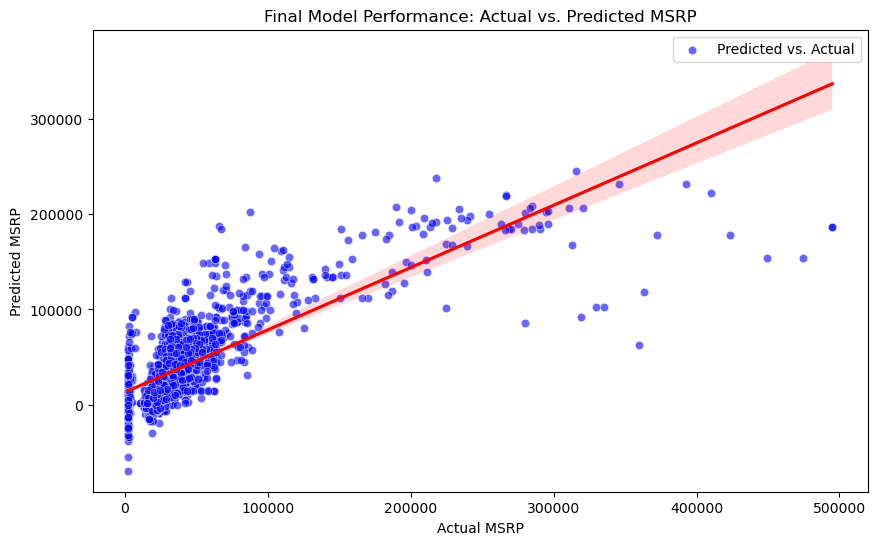

In [80]:
# Scatter plot of actual vs. predicted values with a trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_final, color='blue', alpha=0.6, label='Predicted vs. Actual')
sns.regplot(x=y_test, y=y_pred_final, scatter=False, color='red', line_kws={"label": "Trend Line"})

# Add labels and title
plt.xlabel("Actual MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Final Model Performance: Actual vs. Predicted MSRP")
plt.legend()
plt.show()

The final model achieves a **Mean Absolute Error (MAE) of 19,132**, meaning that, on average, the model's predictions deviate from the actual car prices by about $19,132. The **Mean Squared Error (MSE) of 986,581,918** reflects the squared average of these errors, penalizing larger deviations more heavily. With an **R² Score of 0.60**, the model explains approximately 60% of the variability in car prices (`MSRP`). This level of performance suggests that while the model captures a significant portion of the factors influencing car prices, there is still room for improvement, possibly by incorporating additional predictors or using more complex modeling techniques.

## Conclusion

### Are you satisfied with your final model’s performance? Why or why not?
The final model's performance is satisfactory but not ideal. With an R² score of 0.60, it captures about 60% of the variability in car prices (`MSRP`), indicating that it explains a significant portion of the price drivers. However, an MAE of around $19,132 suggests that there is still a substantial error margin, especially for higher-priced vehicles. This model serves as a good baseline but leaves room for improvement, particularly if higher predictive accuracy is desired.

### What do you propose for the next steps?
To improve the model, several next steps could be pursued:
1. **Feature Engineering**: Create additional features, such as interactions between `Engine HP` and `Vehicle Size`, or use transformations for features like `Popularity` to better capture non-linear relationships.
2. **Data Expansion**: Collect additional data that may impact car pricing, such as brand reputation, customer reviews, and macroeconomic factors, to improve the model’s predictive power.
3. **Testing Advanced Models**: Try more complex models, such as regularized regression (Lasso or Ridge) to reduce overfitting, or tree-based models like Random Forest or Gradient Boosting, which might capture non-linear relationships better than linear regression.

### What would you do differently if you could?
If given the opportunity, I would:
- **Experiment with More Features**: Consider other vehicle-specific or external variables to see if they improve model performance, especially factors related to brand or model reputation.
- **Perform Hyperparameter Tuning**: For advanced models, I would conduct hyperparameter tuning to optimize the model's performance.
- **Normalize Skewed Variables**: Apply transformations like log scaling on skewed variables to see if it helps with accuracy, especially for higher-priced vehicles where errors tend to be larger.

### Communication to Business Leadership
The model highlights key drivers of car pricing, such as `Engine HP`, `Vehicle Size`, and `Engine Cylinders`. For business leadership, this insight can inform strategic decisions in product pricing, marketing, and production. By understanding which features most influence price, leadership can optimize feature combinations for target price ranges, focus marketing efforts on high-value features, and better meet customer expectations. Additionally, the model serves as a foundation that can be expanded for more robust predictions with additional data and advanced modeling techniques, ultimately aiding in more accurate pricing strategies and competitive positioning in the market.
